In [1]:
import pandas as pd 
from rich import print 
import seaborn as sns 
import numpy as np 
import math 
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
from networkx.utils import np_random_state 
from networkx.algorithms import community

In [2]:
import powerlaw

In [3]:
G=nx.read_gexf('final_net.gexf')

# 2) NETWORK CHARACTERIZATION

## 2.1 Basic Measures

In [4]:
#n of Nodes
G.number_of_nodes()

10184

In [5]:
#n of Edges
G.number_of_edges()

11968

In [6]:
#queste sono le dimensioni del nostro grafo G dopo la fase di data cleaning: abbiamo tenuto il giant connected component con 10184 nodi e 11968 links

In [7]:
G.is_directed()
#G is Undirected 

False

In [7]:
#di self-loop non ne abbiamo perchè li abbiamo rimossi nella fase di preprocessing
#self-loop nel nostro caso = io retwitto un mio tweet

### 2.1.1 Degree distribution analysis ##

In [8]:
#Average Degree <k>
avg_degreeRW= 2*G.number_of_edges()/G.number_of_nodes()

In [9]:
print('Avg degree of RW is',avg_degreeRW)

Avg degree of RW is 2.350353495679497

In [10]:
maxdegreeRW=max(dict(G.degree()).values())
mindegreeRW=min(dict(G.degree()).values())

In [11]:
print('MAX degree RW is',maxdegreeRW)
print('min degree RW is',mindegreeRW)
#Max degree = 1956
#min degree = 1

MAX degree RW is 1956

min degree RW is 1

In [12]:
G.degree()
#elenco di tutti i nodi con i loro degrees ki

DegreeView({'290883': 1, '1471971': 1, '2052911': 5, '2827221': 1, '3688111': 1, '4254951': 1, '4615341': 1, '4937571': 1, '5404582': 1, '5516892': 1, '5749002': 1, '5849252': 1, '6266142': 2, '6691762': 11, '7078452': 1, '7703052': 1, '7777302': 2, '8007502': 1, '8052182': 1, '9063952': 1, '9147152': 1, '9731332': 1, '11025592': 1, '11076222': 1, '11486222': 1, '11567702': 1, '12512292': 1, '12610772': 5, '13301942': 1, '13525132': 1, '13748912': 1, '14118020': 1, '14132126': 2, '14152382': 1, '14214964': 1, '14218303': 1, '14314815': 1, '14410543': 1, '14430522': 1, '14446152': 1, '14449273': 2, '14465456': 1, '14491785': 1, '14496536': 13, '14519073': 2, '14522241': 1, '14535500': 1, '14542602': 1, '14568965': 1, '14615214': 1, '14719297': 1, '14761966': 1, '14804672': 1, '14808213': 2, '14828950': 1, '14834002': 1, '14843373': 2, '14932805': 1, '14944543': 1, '14986544': 1, '15021056': 1, '15029604': 2, '15055787': 1, '15060697': 1, '15074415': 1, '15085192': 1, '15090241': 1, '151

In [16]:
# il nodo con Max degree=1956 è il '27493883'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


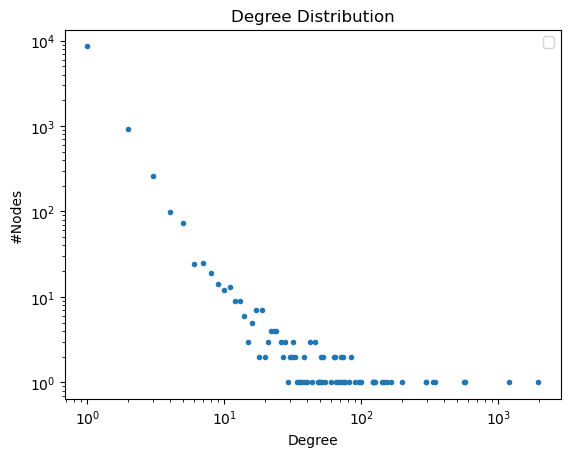

In [16]:
#Degree distribution
hist = nx.degree_histogram(G)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
#plt.show()
#per salvare l'immagine in pdf ho tolto plt.show() e aggiunto plt.legend() e plt.savefig('degree distribution G 2.pdf')
plt.legend()
plt.savefig('degree distribution G 2.pdf')
#probabilities that a randomly chosen node has degree k 

### 2.1.2 Connected component analysis ##

In [17]:
nx.number_connected_components(G)

1

In [18]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)
#H is the largest component 

In [19]:
#n of Edges
H.number_of_edges()

11968

In [20]:
#n of Nodes
H.number_of_nodes()

10184

In [21]:
#H largest component coincide con il nostro grafo G

In [26]:
#infatti il largest component nel nostro network è composto da 10184 come il nostro network stesso

### 2.1.3 Path analysis ##

In [28]:
#SHORTEST PATH= the path with the shortest length between two nodes i.e. the DISTANCE between 2 nodes

In [22]:
diameterRW = nx.diameter(G)
#is the longest shortest path in the graph
print('the diameter of RW is',diameterRW)

the diameter of RW is 18

In [23]:
avg_shortestpathRW = nx.average_shortest_path_length(G)
#avg of all the shortest paths 
#più questo valore è piccolo, più il network è compatto
print('the Avg shortest path of RW is',avg_shortestpathRW)

the Avg shortest path of RW is 4.972121353619957

In [31]:
print(nx.average_shortest_path_length(G))

4.972121353619957

### 2.1.4 Clustering Coefficient & Density analysis ##

In [24]:
#local clustering coeff
nx.clustering(G)
#ratio between the closed triangles that include node i and the potential triangles that node i can form 
#Ci=2xei/kix(ki-1)
#'6266142','16176454','17303858','17378581','18058085','19284888','19765553','21036796','21495530','21567649','21754958','21884679','22407417','22858466','23284066','24021806','25499975','26994187','28830796','31994671','43235064','43345762','43977694','49461561','54999242','55181938','60399177','61399101',

{'290883': 0,
 '1471971': 0,
 '2052911': 0.2,
 '2827221': 0,
 '3688111': 0,
 '4254951': 0,
 '4615341': 0,
 '4937571': 0,
 '5404582': 0,
 '5516892': 0,
 '5749002': 0,
 '5849252': 0,
 '6266142': 1.0,
 '6691762': 0,
 '7078452': 0,
 '7703052': 0,
 '7777302': 0,
 '8007502': 0,
 '8052182': 0,
 '9063952': 0,
 '9147152': 0,
 '9731332': 0,
 '11025592': 0,
 '11076222': 0,
 '11486222': 0,
 '11567702': 0,
 '12512292': 0,
 '12610772': 0.2,
 '13301942': 0,
 '13525132': 0,
 '13748912': 0,
 '14118020': 0,
 '14132126': 0,
 '14152382': 0,
 '14214964': 0,
 '14218303': 0,
 '14314815': 0,
 '14410543': 0,
 '14430522': 0,
 '14446152': 0,
 '14449273': 0,
 '14465456': 0,
 '14491785': 0,
 '14496536': 0.01282051282051282,
 '14519073': 0,
 '14522241': 0,
 '14535500': 0,
 '14542602': 0,
 '14568965': 0,
 '14615214': 0,
 '14719297': 0,
 '14761966': 0,
 '14804672': 0,
 '14808213': 0,
 '14828950': 0,
 '14834002': 0,
 '14843373': 0,
 '14932805': 0,
 '14944543': 0,
 '14986544': 0,
 '15021056': 0,
 '15029604': 0,
 '15055

In [25]:
#qual'è il nodo con Max clust coeff?

In [26]:
max_clustcoeff = max(nx.clustering(G), key = nx.clustering(G).get)
print(max_clustcoeff)

6266142

In [27]:
#mi dice che il nodo con il Max Clust Coeff è il nodo '6266142' che ha localclustcoeff=1.0 
#ma in realtà ci sono più nodi che hanno ClustCoeff=1.0, vediamo quali
#nodi con ClustCoeff=1.0 sono:
#'6266142','16176454','17303858','17378581','18058085','19284888','19765553','21036796','21495530','21567649','21754958','21884679','22407417','22858466','23284066','24021806','25499975','26994187','28830796','31994671','43235064','43345762','43977694','49461561','54999242','55181938','60399177','61399101'

In [28]:
#average clustering coefficient
avg_clustcoeffRW = nx.average_clustering(G)
#avgC = 1/NxsommCi
print('the Avg Clust Coeff of RW is',avg_clustcoeffRW)

the Avg Clust Coeff of RW is 0.038286867966346165

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


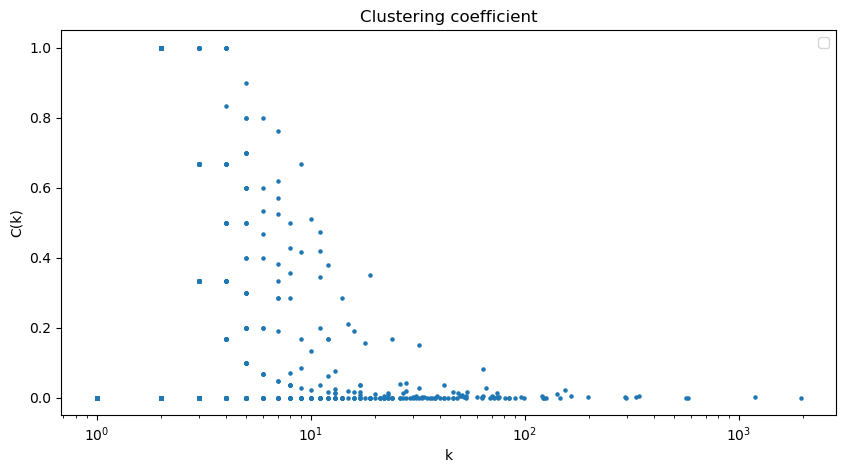

In [30]:
#distribution of clustering coeffient based on the degree k of the node
degrees = G.degree()

y = []
x = []

for degree in degrees:
    node = degree[0]
    degree = degree[1]
    local_clustering_coefficient = nx.clustering(G,node) #calculate local clustering coefficient
    y.append(local_clustering_coefficient)
    x.append(degree)

    
plt.figure(figsize=(10,5))
plt.scatter(x, y,s=5)
#plt.markersize('5')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("C(k)")
plt.title("Clustering coefficient")
plt.savefig('cluster_coefficient_distribution.pdf',format='pdf')

#plt.show()
plt.legend()
plt.savefig('NetChar_clustering coeff distribution G.pdf')

In [31]:
#Density=L/Lmax i.e. n of links/ n of possible links
densityRW = nx.density(G)
print('the Density of RW is',densityRW)
#0.00023081149913380117

the Density of RW is 0.00023081149913380117

In [44]:
#as most real networks, even this one tends to be sparse i.e. it has very very few edges wrt the potential ones:
## <k> << N-1 ,
## L << Lmax ,
## D(G)=L/Lmax << 1.

### 2.1.5 Centrality analysis ##

In [45]:
#Degree Centrality = degree_centr
#Closeness Centrality = closeness_centr
#Betweeness Centrality = betweenness_centr
#Harmonic Centrality = harmonic_centr
#PageRank = pagerank_centr

##### Degree Centrality 

In [32]:
degree_centr = nx.degree_centrality(G)
degree_centr
#how many neighbors does a node have?

{'290883': 9.820288716488265e-05,
 '1471971': 9.820288716488265e-05,
 '2052911': 0.0004910144358244132,
 '2827221': 9.820288716488265e-05,
 '3688111': 9.820288716488265e-05,
 '4254951': 9.820288716488265e-05,
 '4615341': 9.820288716488265e-05,
 '4937571': 9.820288716488265e-05,
 '5404582': 9.820288716488265e-05,
 '5516892': 9.820288716488265e-05,
 '5749002': 9.820288716488265e-05,
 '5849252': 9.820288716488265e-05,
 '6266142': 0.0001964057743297653,
 '6691762': 0.0010802317588137092,
 '7078452': 9.820288716488265e-05,
 '7703052': 9.820288716488265e-05,
 '7777302': 0.0001964057743297653,
 '8007502': 9.820288716488265e-05,
 '8052182': 9.820288716488265e-05,
 '9063952': 9.820288716488265e-05,
 '9147152': 9.820288716488265e-05,
 '9731332': 9.820288716488265e-05,
 '11025592': 9.820288716488265e-05,
 '11076222': 9.820288716488265e-05,
 '11486222': 9.820288716488265e-05,
 '11567702': 9.820288716488265e-05,
 '12512292': 9.820288716488265e-05,
 '12610772': 0.0004910144358244132,
 '13301942': 9.

In [33]:
#quali sono i nodi con la Degree centrality più alta?

In [34]:
#Massimi valori della Degree Centrality 
lista_degcentr = []
for v in degree_centr.values():
    lista_degcentr.append(v)
m = max(lista_degcentr)
m
#0.19208484729451045

0.19208484729451045

In [35]:
for v in lista_degcentr: 
    if v == m :
        lista_degcentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_degcentr)
m
#0.11745065304919965

0.11745065304919965

In [36]:
for v in lista_degcentr: 
    if v == m :
        lista_degcentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_degcentr)
m
#0.0565648630069724

0.0565648630069724

In [37]:
#a quali nodi corrispondono questi valori di DegCentr?

In [39]:
for k,v in degree_centr.items():
    if v == 0.19208484729451045:
        print('il 1° Max Degree centr è il nodo ',k)

for k,v in degree_centr.items():
    if v == 0.11745065304919965:
        print('il 2° Max Degree centr è il nodo ',k)

for k,v in degree_centr.items():
    if v == 0.0565648630069724:
        print('il 3° Max Degree centr è il nodo ',k)
        
#mi va a stampare i nodi che hanno quelle degreecentr che gli ho dato        

il 1° Max Degree centr è il nodo  27493883

il 2° Max Degree centr è il nodo  2956836471

il 3° Max Degree centr è il nodo  4018888580

In [ ]:
#quindi i primi tre Max Degree Centrality sono:
#1° 0.19208484729451045 del nodo '27493883'
#2° 0.11745065304919965 del nodo '2956836471'
#3° 0.0565648630069724 del nodo '4018888580'

##### Closeness Centrality 

In [40]:
closeness_centr = nx.closeness_centrality(G)
closeness_centr
#questa Closeness è normalizzata Ci = N-1 / somm li,j : quindi devo cercare i Max

{'290883': 0.2224576734025123,
 '1471971': 0.21648914684184792,
 '2052911': 0.23828801422754714,
 '2827221': 0.22041125541125542,
 '3688111': 0.1615067406819984,
 '4254951': 0.13387762614709053,
 '4615341': 0.2517926907670244,
 '4937571': 0.22041125541125542,
 '5404582': 0.13195542309187508,
 '5516892': 0.22041125541125542,
 '5749002': 0.22195339915865647,
 '5849252': 0.20859109344913762,
 '6266142': 0.24089801518771733,
 '6691762': 0.15132106874312717,
 '7078452': 0.13387762614709053,
 '7703052': 0.13131052624792067,
 '7777302': 0.20796487286837537,
 '8007502': 0.22041125541125542,
 '8052182': 0.2224576734025123,
 '9063952': 0.13238773759068098,
 '9147152': 0.15926864364364365,
 '9731332': 0.2224576734025123,
 '11025592': 0.1788782124475205,
 '11076222': 0.21154205704551593,
 '11486222': 0.2517926907670244,
 '11567702': 0.19277587414573197,
 '12512292': 0.15464402867209331,
 '12610772': 0.2014361449596455,
 '13301942': 0.15124914594658825,
 '13525132': 0.19352692994792656,
 '13748912'

In [41]:
#Massimi valori della Closeness Centrality 
lista_closenesscentr = []
for v in closeness_centr.values():
    lista_closenesscentr.append(v)
m = max(lista_closenesscentr)
m

0.3365168539325843

In [42]:
for v in lista_closenesscentr: 
    if v == m :
        lista_closenesscentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_closenesscentr)
m

0.3077550773694391

In [43]:
for v in lista_closenesscentr: 
    if v == m :
        lista_closenesscentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_closenesscentr)
m

0.3014059493858221

In [44]:
#a quali nodi corrispondono questi valori di ClosenessCentr?

In [46]:
for k,v in closeness_centr.items():
    if v == 0.3365168539325843:
        print('il 1° Max Closeness è il nodo ',k)
        
for k,v in closeness_centr.items():
    if v == 0.3077550773694391:
        print('il 2° Max Closeness è il nodo ',k)
        
for k,v in closeness_centr.items():
    if v == 0.3014059493858221:
        print('il 3° Max Closeness è il nodo ',k)
        
#mi va a stampare i nodi che hanno quelle closeness che gli ho dato

il 1° Max Closeness è il nodo  27493883

il 2° Max Closeness è il nodo  919915692375330816

il 3° Max Closeness è il nodo  2202063265

In [ ]:
#quindi i primi tre Max Closeness Centrality sono:
#1° 0.3365168539325843 del nodo '27493883'
#2° 0.3077550773694391 del nodo '919915692375330816'
#3° 0.3014059493858221 del nodo '2202063265'

##### Betweeness Centrality

In [47]:
betweenness_centr = nx.betweenness_centrality(G)
betweenness_centr

{'290883': 0.0,
 '1471971': 0.0,
 '2052911': 9.495842676407755e-05,
 '2827221': 0.0,
 '3688111': 0.0,
 '4254951': 0.0,
 '4615341': 0.0,
 '4937571': 0.0,
 '5404582': 0.0,
 '5516892': 0.0,
 '5749002': 0.0,
 '5849252': 0.0,
 '6266142': 0.0,
 '6691762': 0.0019631897154205324,
 '7078452': 0.0,
 '7703052': 0.0,
 '7777302': 0.0001581609269835421,
 '8007502': 0.0,
 '8052182': 0.0,
 '9063952': 0.0,
 '9147152': 0.0,
 '9731332': 0.0,
 '11025592': 0.0,
 '11076222': 0.0,
 '11486222': 0.0,
 '11567702': 0.0,
 '12512292': 0.0,
 '12610772': 0.0004213958804664013,
 '13301942': 0.0,
 '13525132': 0.0,
 '13748912': 0.0,
 '14118020': 0.0,
 '14132126': 0.00021788144691674166,
 '14152382': 0.0,
 '14214964': 0.0,
 '14218303': 0.0,
 '14314815': 0.0,
 '14410543': 0.0,
 '14430522': 0.0,
 '14446152': 0.0,
 '14449273': 0.00038468546175520624,
 '14465456': 0.0,
 '14491785': 0.0,
 '14496536': 0.0012264214354990952,
 '14519073': 0.0001964057743297653,
 '14522241': 0.0,
 '14535500': 0.0,
 '14542602': 0.0,
 '14568965': 

In [48]:
#Massimi valori della Betweeness 
lista_betweennesscentr = []
for v in betweenness_centr.values():
    lista_betweennesscentr.append(v)
m = max(lista_betweennesscentr)
m

0.44578357399624297

In [49]:
#il primo Max BE è 0.44578357399624297, ora lo togliamo dalla lista e andiamo a calcolare il secondo Max BE

In [50]:
for v in lista_betweennesscentr: 
    if v == m :
        lista_betweennesscentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_betweennesscentr)
m

0.2131705400806046

In [51]:
#il secondo Max BE è 0.2131705400806046, ora lo togliamo dalla lista e andiamo a calcolare il secondo Max BE

In [52]:
for v in lista_betweennesscentr: 
    if v == m :
        lista_betweennesscentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_betweennesscentr)
m

0.2052659423420334

In [71]:
#il terzo Max BE è 0.2052659423420334, ora lo togliamo dalla lista e andiamo a calcolare il terzo Max BE

In [73]:
#a quali nodi corrispondono questi valori di ClosenessCentr?

In [54]:
for k,v in betweenness_centr.items():
    if v == 0.44578357399624297:
        print('il 1° Max Betweenness è il nodo ',k)
        
for k,v in betweenness_centr.items():
    if v == 0.2131705400806046:
        print('il 2° Max Betweenness è il nodo ',k)
        
for k,v in betweenness_centr.items():
    if v == 0.2052659423420334:
        print('il 3° Max Betweenness è il nodo ',k)
        
#mi va a stampare i nodi che hanno quelle betweenness che gli ho dato

il 1° Max Betweenness è il nodo  27493883

il 2° Max Betweenness è il nodo  2453069245

il 3° Max Betweenness è il nodo  2956836471

In [ ]:
#il terzo Max BE è 0.15318886874856297
#quindi i primi tre Max BE sono:
#1° 0.44578357399624297 del nodo 27493883
#2° 0.2131705400806046 del nodo 2453069245
#3° 0.2052659423420334 del nodo 2956836471

##### Harmonic Centrality

In [55]:
harmonic_centr = nx.harmonic_centrality(G)
harmonic_centr
#harmonic_centr= somm 1/li,j , sommatoria di 1/sh path fra i e j
#questa non è normalizzata

{'763104361799114752': 2200.1576673327195,
 '43750097': 2938.9945887445724,
 '740510958397861888': 2938.9945887445724,
 '1015253439557849094': 2938.9945887445724,
 '1216443083673473025': 2329.227616827631,
 '1485675218043641859': 1008.307654845249,
 '161536335': 1569.439105339118,
 '398024643': 2087.4946109446955,
 '995396193382518784': 2557.893795093766,
 '1443840264213311536': 1727.743290043424,
 '867643763493027840': 2471.1692834942723,
 '526579473': 1395.4661116659765,
 '1017660930': 2039.8462676214283,
 '853381369724063745': 2636.998251748246,
 '419912457': 2621.948251748247,
 '922987529149628416': 1299.5978576977752,
 '1029413098959130624': 1393.2656704405904,
 '1084625267514068992': 1520.8399544899291,
 '1453776885188632583': 1608.50937118445,
 '37724859': 2445.700235875232,
 '50005040': 1899.04738872254,
 '2876041031': 2006.775960151076,
 '928089000153190400': 2497.419227994235,
 '1213274423064547329': 1942.0338023090092,
 '800088066283085824': 2938.9945887445724,
 '14762345953

In [77]:
#per renderla normalizzata dobbiamo dividere tutto per N-1
# hacN = (somm 1/li,j) / N-1

In [56]:
harmonic_centr_normalized = harmonic_centr.values() / (G.number_of_nodes()-1)
harmonic_centr_normalized

TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'

In [57]:
#non riesco a normalizzarla...

In [58]:
#e allora proviamo ad usare quella non normalizzzata

In [59]:
#Massimi valori della Harmonic Centrality
lista_harmoniccentr = []
for v in harmonic_centr.values():
    lista_harmoniccentr.append(v)
m = max(lista_harmoniccentr)
m
#4580.674783549814

4580.674783549814

In [60]:
for v in lista_harmoniccentr: 
    if v == m :
        lista_harmoniccentr.remove(m)
m = max(lista_harmoniccentr)
m
#3744.74898989909

3744.74898989909

In [61]:
for v in lista_harmoniccentr: 
    if v == m :
        lista_harmoniccentr.remove(m)
m = max(lista_harmoniccentr)
m
#3713.731890331971

3713.731890331971

In [62]:
#questi sono i 3 valori Max di Harmonic centrality

In [ ]:
#a quali nodi corrispondono questi valori di Harmonic centrality?

In [63]:
for k,v in harmonic_centr.items():
    if v == 4580.674783549814:
        print('il 1° Max HarmonicCentr è il nodo ',k)
        
for k,v in harmonic_centr.items():
    if v == 3744.74898989909:
        print('il 2° Max HarmonicCentr è il nodo ',k)
        
for k,v in harmonic_centr.items():
    if v == 3713.731890331971:
        print('il 3° Max HarmonicCentr è il nodo ',k)
        
#mi va a stampare i nodi che ha la HarmonicCentr pari ai valori che gli ho dato

il 1° Max HarmonicCentr è il nodo  27493883

il 2° Max HarmonicCentr è il nodo  2956836471

il 3° Max HarmonicCentr è il nodo  2202063265

##### Page Rank

In [64]:
pagerank_centr = nx.pagerank(G)
pagerank_centr

{'290883': 4.5437423818097003e-05,
 '1471971': 4.940059012949059e-05,
 '2052911': 0.00013487331532834653,
 '2827221': 4.974232535317275e-05,
 '3688111': 5.2142287007014004e-05,
 '4254951': 5.366620681499014e-05,
 '4615341': 4.890618736280352e-05,
 '4937571': 4.974232535317275e-05,
 '5404582': 5.2417412437707206e-05,
 '5516892': 4.974232535317275e-05,
 '5749002': 4.7510229678267674e-05,
 '5849252': 4.2948711620318996e-05,
 '6266142': 6.769309717485263e-05,
 '6691762': 0.0005243336711437126,
 '7078452': 5.366620681499014e-05,
 '7703052': 5.712852697893742e-05,
 '7777302': 7.820632812526889e-05,
 '8007502': 4.974232535317275e-05,
 '8052182': 4.5437423818097003e-05,
 '9063952': 5.36842002179685e-05,
 '9147152': 5.2438495700116955e-05,
 '9731332': 4.5437423818097003e-05,
 '11025592': 4.6459382941047663e-05,
 '11076222': 4.61812148620732e-05,
 '11486222': 4.890618736280352e-05,
 '11567702': 4.7670681751473095e-05,
 '12512292': 4.55681633653309e-05,
 '12610772': 0.0001896210218869983,
 '13301

In [65]:
#Massimi valori della PageRank 
lista_pagerankcentr = []
for v in pagerank_centr.values():
    lista_pagerankcentr.append(v)
m = max(lista_pagerankcentr)
m
#0.07966884424535862

0.07966884424535862

In [66]:
for v in lista_pagerankcentr: 
    if v == m :
        lista_pagerankcentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_pagerankcentr)
m
#0.04356144748651637

0.04356144748651637

In [67]:
for v in lista_pagerankcentr: 
    if v == m :
        lista_pagerankcentr.remove(m) #come eliminare i valori di una losta? vpgliamo eliminare il Max per poi ricalcolarlo
m = max(lista_pagerankcentr)
m
#0.024067341080420062

0.024067341080420062

In [94]:
#a quali nodi corrispondono questi valori di PageRankCentr?

In [68]:
for k,v in pagerank_centr.items():
    if v == 0.07966884424535862:
        print('il 1° Max PageRank è il nodo ',k)
        
for k,v in pagerank_centr.items():
    if v == 0.04356144748651637:
        print('il 2° Max PageRank è il nodo ',k)
        
for k,v in pagerank_centr.items():
    if v == 0.024067341080420062:
        print('il 3° Max PageRank è il nodo ',k)
        
#mi va a stampare i nodi che ha la pagerank pari ai valori che gli ho dato

il 1° Max PageRank è il nodo  27493883

il 2° Max PageRank è il nodo  2956836471

il 3° Max PageRank è il nodo  4018888580

##### Assortativity

In [69]:
#homophily  = property of a network for which nodes with the same attitudes tend to be connected with an higher probability than expected
#to measure it we can use the assortativity measure R

In [70]:
#oppure..
nx.attribute_assortativity_coefficient(G, "color")
#Compute assortativity for node attributes.
#Assortativity measures the similarity of connections in the graph with respect to the given attribute (es. color).
#nel nostro caso potremmo vederla in base all'attributo 'categoria'

C:\Users\Giulia\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:278: RuntimeWarning: invalid value encountered in double_scalars
  r = (t - s) / (1 - s)


nan

In [71]:
#calculate degree assortativity coefficient
r = nx.degree_assortativity_coefficient(G)
print('Degree Assortativity Coefficient r is',r)

Degree Assortativity Coefficient r is -0.2379452424744904

In [72]:
#nodes correlation through assortativity 

In [73]:
knn = nx.k_nearest_neighbors(G) #calculate the average nearest neighbor degree of nodes with degree k.
knn = dict(sorted(knn.items()))

C:\Users\Giulia\AppData\Local\Temp\ipykernel_18944\3471240506.py:1: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn = nx.k_nearest_neighbors(G) #calculate the average nearest neighbor degree of nodes with degree k.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


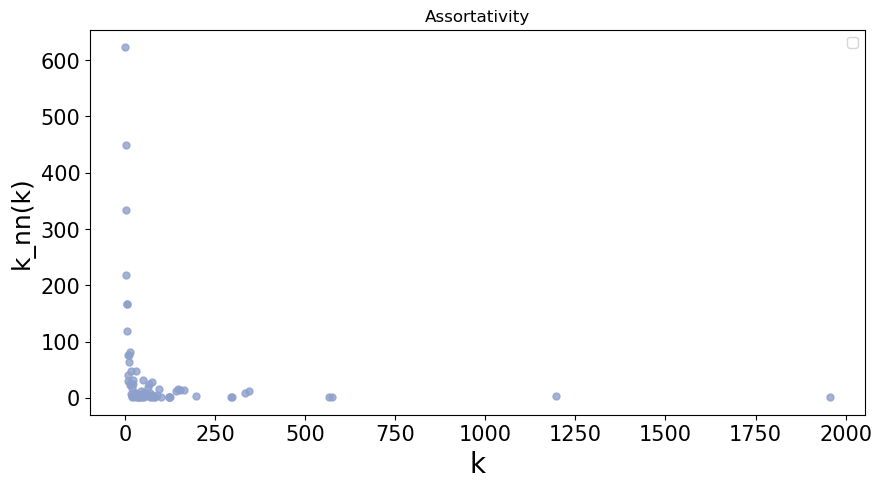

In [75]:
plt.figure(figsize=(10,5))

plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8, color = "#8DA0CB")
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Assortativity")
#plt.show()
plt.legend()
plt.savefig('NetChar_Assortativity G.pdf')

## 2.2 Synthethic graphs ##

In [102]:
#Erdos-Renyi ER = er 
#Barabasi-Albert BA = ba
#Watts-Strogatz WS = ws
#(Configuration Model CM)

### 2.2.1 Erdos-Renyi model ###

In [ ]:
#con p=0.05 otteniamo L=2593029 che è troppo grande
#vogliamo trovare la p che ci dia un ER con un L simile al nostro L=11968

In [ ]:
#siamo partiti da p=0.05 e abbassandola sempre di più siamo arrivati a p=0.000225 che ci ha dato L=11726 che è simile a 11968

In [ ]:
#p=0.000225

In [76]:
#ER (random graphs)
#proviamo con p=0.0025, vogliamo un L simile al nostro L=11968
er = nx.erdos_renyi_graph(10184,0.000225)

In [78]:
#n of Nodes e n of Links
n_nodesER = er.number_of_nodes()
n_linksER = er.number_of_edges()

In [79]:
#n of Edges
n_linksER

11773

In [ ]:
#p=0.00025 è il valore giusto

In [80]:
#n of Nodes e n of Links
er.number_of_nodes()
er.number_of_edges()
print('N of nodes ER is',er.number_of_nodes())
print('N of links ER is',er.number_of_edges())

N of nodes ER is 10184

N of links ER is 11773

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


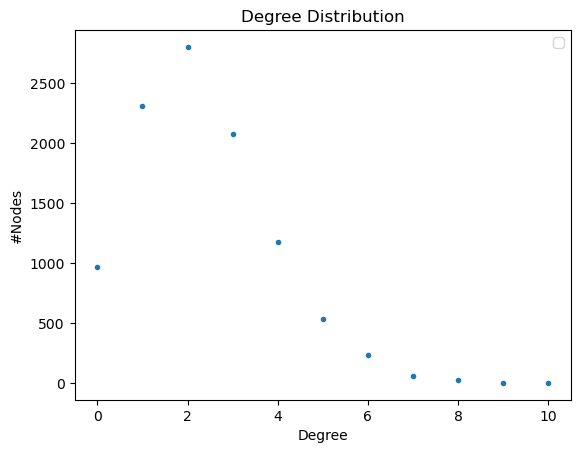

In [82]:
#ER degree distribution
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
#plt.show()
plt.legend()
plt.savefig('NetChar_Degree distribution ER.pdf')

In [83]:
#avg degree, Max degree, min degree di ER

In [84]:
#Average Degree <k> of ER
avg_degreeER = sum(dict(er.degree()).values())/float(len(er))
print('the Avg degree of ER is',avg_degreeER)
#2.2880989787902593

the Avg degree of ER is 2.3120581304006285

In [85]:
maxdegreeER=max(dict(er.degree()).values())
mindegreeER=min(dict(er.degree()).values())

In [87]:
print('Max degree of ER is',maxdegreeER)
print('min degree of ER is',mindegreeER)
#Max degree ER = 10
#min degree ER = 0

Max degree of ER is 10

min degree of ER is 0

In [88]:
#dato che il min degree è 0 ci saranno dei nodi isolati...

In [89]:
#diameter, Avg shortest path, Avg clustering coeff e Density

In [90]:
#Avg shortest path
#diameter

In [91]:
#Avg shortest path
avg_shortestpathER = nx.average_shortest_path_length(er)
#avg of all the shortest paths 
#più questo valore è piccolo, più il network è compatto
print('the Avg shortest path of ER is',avg_shortestpathER)

NetworkXError: Graph is not connected.

In [92]:
diameterER = nx.diameter(er)
#is the longest shortest path in the graph
print('the diameter of ER is',diameterER)

#Found infinite path length because the graph is not connected
#vuol dire che il ER non è tutto connesso
#vedere l'analisi del connected component!

NetworkXError: Found infinite path length because the graph is not connected

In [ ]:
#Found infinite path length because the graph is not connected
#vuol dire che il ER non è tutto connesso

In [93]:
#analisi del largest connected component ER

In [95]:
nx.number_connected_components(er)
#numero di connected components in ER

1125

In [96]:
# largest connected component
componentsER = nx.connected_components(er)
largest_componentER = max(componentsER, key=len)
H_er = er.subgraph(largest_componentER)
#H_er is the largest component of ER

In [97]:
n_nodes_H_er = H_er.number_of_nodes()
n_links_H_er = H_er.number_of_edges()
print('N of nodes H_er is',H_er.number_of_nodes())
print('N of links H_er is',H_er.number_of_edges())

N of nodes H_er is 8847

N of links H_er is 11560

In [98]:
#il ER ha 1190 connected component
#il più grande è H_er che ha N=8782 e L=11506

In [99]:
#andiamo a vedere diameter e avg shortest path del H_er 

In [100]:
diameter_H_er = nx.diameter(H_er)
#is the longest shortest path in the graph
print('the diameter of H_er is',diameter_H_er)

KeyboardInterrupt: 

In [361]:
#Avg shortest path
avg_shortestpath_H_er = nx.average_shortest_path_length(H_er)
#avg of all the shortest paths 
#più questo valore è piccolo, più il network è compatto
print('the Avg shortest path of H_er is',avg_shortestpath_H_er)

the Avg shortest path of H_er is 10.624925413094166

In [ ]:
#Avg clustering coefficient
#Density

In [114]:
#average clustering coefficient
avg_clustcoeffER = nx.average_clustering(er)
#avgC = 1/NxsommCi
print('the Avg Clust Coeff of ER is',avg_clustcoeffER)

the Avg Clust Coeff of ER is 2.6184865147944494e-05

In [115]:
#Density=L/Lmax i.e. n of links/ n of possible links
densityER = nx.density(er)
print('the Density of ER is',densityER)
#

the Density of ER is 0.00022705078369838244

In [ ]:
#regimi?

### 2.2.2 Barabasi-Albert model ###

In [ ]:
#A graph of n nodes is grown by attaching new nodes each with m edges that are preferentially attached to existing nodes with high degree.

In [365]:
#con m=7 otteniamo un L troppo alto..
#vogliamo trovare la m che ci dia un L simile al nostro L=11968

In [ ]:
#siamo partiti da m=7 e l'abbiamo abbassata sempre più fino a m=1 con cui L=

In [ ]:
#m=1

In [101]:
#BA model con m=1
m = 1  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(10184, m)
#nx.draw(ba)

In [102]:
#n of Nodes e n of Links
n_nodesBA = ba.number_of_nodes()
n_linksBA = ba.number_of_edges()

In [103]:
#n of Edges
n_linksBA

10183

In [ ]:
#m=1 è il valore giusto 

In [ ]:
#siamo partiti da m=7 e abbassandola sempre di più siamo arrivati a m=1 che ci ha dato L=10183 che è simile al nostro L=11968

In [104]:
#n of Nodes e n of Links
ba.number_of_nodes()
ba.number_of_edges()

print('N of nodes BA is',ba.number_of_nodes())
print('N of links BA is',ba.number_of_edges())

N of nodes BA is 10184

N of links BA is 10183

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


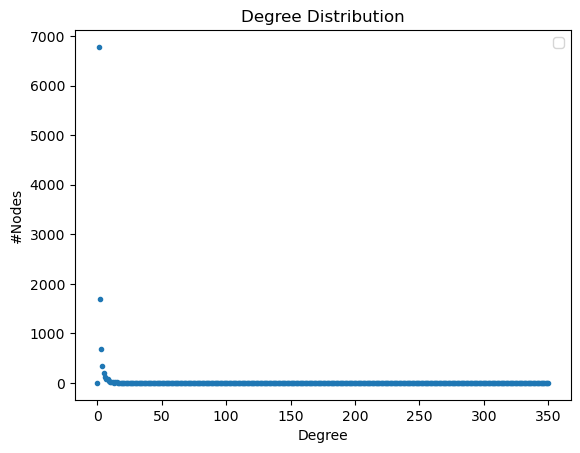

In [106]:
#BA degree distribution
hist = nx.degree_histogram(ba)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
#plt.show()
plt.legend()
plt.savefig('NetChar_Degree distribution BA.pdf')

In [107]:
#Average Degree <k> of BA
avg_degreeBA = sum(dict(ba.degree()).values())/float(len(ba))
print('the Avg degree BA is',avg_degreeBA)

the Avg degree BA is 1.9998036135113904

In [108]:
maxdegreeBA=max(dict(ba.degree()).values())
mindegreeBA=min(dict(ba.degree()).values())

In [109]:
print('Max degree of BA is',maxdegreeBA)
print('min degree of BA is',mindegreeBA)
#Max degree BA = 160
#min degree BA = 1

Max degree of BA is 350

min degree of BA is 1

In [ ]:
#diameter, Avg shortest path, Avg clustering coeff e Density

In [110]:
nx.number_connected_components(ba)
#numero di connected components in BA

1

In [ ]:
#avg shortest path e diameter

In [375]:
#Avg shortest path
avg_shortestpathBA = nx.average_shortest_path_length(ba)
#avg of all the shortest paths 
#più questo valore è piccolo, più il network è compatto
print('the Avg shortest path of BA is',avg_shortestpathBA)

the Avg shortest path of BA is 9.229087220749522

In [376]:
diameterBA = nx.diameter(ba)
#is the longest shortest path in the graph
print('the diameter of BA is',diameterBA)

the diameter of BA is 27

In [ ]:
#Avg clustering coefficient
#Density

In [111]:
#average clustering coefficient
avg_clustcoeffBA = nx.average_clustering(ba)
#avgC = 1/NxsommCi
print('the Avg Clust Coeff of BA is',avg_clustcoeffBA)

the Avg Clust Coeff of BA is 0.0

In [112]:
#come è possibile che avg clust coeff di BA venga 0??????

In [113]:
#Density=L/Lmax i.e. n of links/ n of possible links
densityBA = nx.density(ba)
print('the Density of BA is',densityBA)

the Density of BA is 0.00019638648860958367

### 2.2.3 Watts-Strogatz model ###

In [ ]:
#from p=0 Regular model, to small world in between, to p=1 fully random model
#Each node is joined with its k nearest neighbors in a ring topology.

In [ ]:
#con p=0.05 il n di link è troppo alto
#dobbiamo trovare la p che ci dia un L simile al nostro L=11968

In [ ]:
#siamo partiti con p=0.05 e l'abbiamo 

In [ ]:
#L non dipende da p, proviamo a cambiare k

In [ ]:
#con k=4 abbiamo un L troppo grande rispetto al nostro L=11968
#vogliamo trovare la k che ci dia una L simile al nostro

In [ ]:
#abbiamo abbassato la k e con k=3 abbiamo L=10184 che è simile al nostro L=11968

In [116]:
# Watts-Strogatz model small-world regime (0.001 < p < 0.1)
ws = nx.watts_strogatz_graph(10184, k=3, p=0.05)
#nx.draw(ws)

In [ ]:
#n of Nodes e n of Links
n_nodesWS = ws.number_of_nodes()
n_linksWS = ws.number_of_edges()

In [117]:
#n of Edges
ws.number_of_edges()

10184

In [118]:
#n of Nodes e n of Links
ws.number_of_nodes()
ws.number_of_edges()

print('N of nodes WS is',ws.number_of_nodes())
print('N of links WS is',ws.number_of_edges())

N of nodes WS is 10184

N of links WS is 10184

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


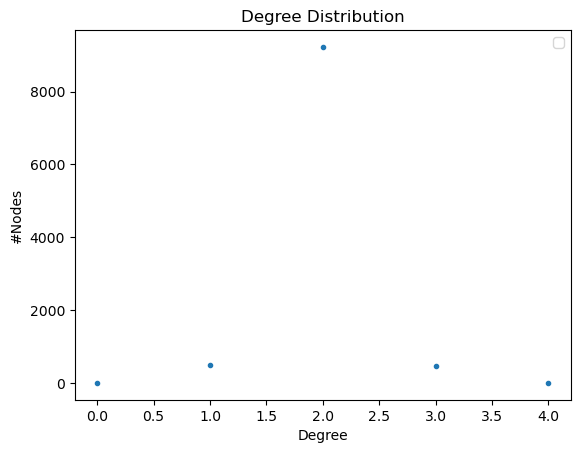

In [120]:
#WS degree distribution
hist = nx.degree_histogram(ws)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
#plt.show()
plt.legend()
plt.savefig('NetChar_Degree distribution WS.pdf')

In [121]:
#Average Degree <k> of WS
avg_degreeWS = sum(dict(ws.degree()).values())/float(len(ws))
print('the Avg degree WS is',avg_degreeWS)

the Avg degree WS is 2.0

In [122]:
maxdegreeWS=max(dict(ws.degree()).values())
mindegreeWS=min(dict(ws.degree()).values())

In [123]:
print('Max degree of WS is',maxdegreeWS)
print('min degree of WS is',mindegreeWS)
#Max degree BA = 4
#min degree BA = 1

Max degree of WS is 4

min degree of WS is 1

In [ ]:
#diameter, Avg shortest path, Avg clustering coeff e Density

In [ ]:
#avg shortest path e diameter

In [388]:
#Avg shortest path
avg_shortestpathWS = nx.average_shortest_path_length(ws)
#avg of all the shortest paths 
#più questo valore è piccolo, più il network è compatto
print('the Avg shortest path of WS is',avg_shortestpathWS)

NetworkXError: Graph is not connected.

In [389]:
diameterWS = nx.diameter(ws)
#is the longest shortest path in the graph
print('the diameter of WS is',diameterWS)

NetworkXError: Found infinite path length because the graph is not connected

In [ ]:
#Found infinite path length because the graph is not connected
#vuol dire che il WS non è tutto connesso
#vedere l'analisi del connected component!

In [124]:
nx.number_connected_components(ws)
#numero di connected components in WS

3

In [125]:
# largest connected component
componentsWS = nx.connected_components(ws)
largest_componentWS = max(componentsWS, key=len)
H_ws = ws.subgraph(largest_componentWS)
#H_ws is the largest component of WS

In [126]:
n_nodes_H_ws = H_ws.number_of_nodes()
n_links_H_ws = H_ws.number_of_edges()
print('N of nodes H_ws is',H_ws.number_of_nodes())
print('N of links H_ws is',H_ws.number_of_edges())

N of nodes H_ws is 10113

N of links H_ws is 10113

In [ ]:
#il WS ha 3 connected component
#il più grande è H_er che ha N=9181 e L=9181

In [ ]:
#andiamo a vedere diameter e avg shortest path del H_ws 

In [398]:
diameter_H_ws = nx.diameter(H_ws)
#is the longest shortest path in the graph
print('the diameter of H_ws is',diameter_H_ws)

the diameter of H_ws is 1065

In [399]:
#Avg shortest path
avg_shortestpath_H_ws = nx.average_shortest_path_length(H_ws)
#avg of all the shortest paths 
#più questo valore è piccolo, più il network è compatto
print('the Avg shortest path of H_ws is',avg_shortestpath_H_ws)

the Avg shortest path of H_ws is 409.16522471458177

In [400]:
#Avg clustering coefficient
#Density

In [127]:
#average clustering coefficient
avg_clustcoeffWS = nx.average_clustering(ws)
#avgC = 1/NxsommCi
print('the Avg Clust Coeff of WS is',avg_clustcoeffWS)

the Avg Clust Coeff of WS is 0.0

In [128]:
#Density=L/Lmax i.e. n of links/ n of possible links
densityWS = nx.density(ws)
print('the Density of WS is',densityWS)

the Density of WS is 0.0001964057743297653

### degree distributions a confronto fra RW,ER, BA e WS ###

In [133]:
def degree_dist_plot(graphs):
    fig = plt.figure(figsize=(16,8))
    labels = []
    for i in graphs:
        if i[0].is_directed():
            degrees = i[0].in_degree() # dictionary node:degree
        else:
            degrees = i[0].degree() # dictionary node:degree
        values = sorted(set([v for k, v in degrees]))
        hist = [[v for k, v in degrees].count(x) for x in values]
        labels.append(i[1])
        if(i[1] == "Real World"):
            plt.loglog(values, hist, 'o-') # in-degree
        else:
            plt.loglog(values, hist, 'o') # in-degree
    fontsize = 15
    
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Degree", fontsize=fontsize)
    plt.ylabel("Number of nodes", fontsize=fontsize)
    plt.title("Degree Distribution", fontsize=fontsize)
    plt.legend(labels, fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xlim([0, 2*10**2])
    
    #plt.show()

C:\Users\Giulia\AppData\Local\Temp\ipykernel_18944\2420778313.py:24: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 2*10**2])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


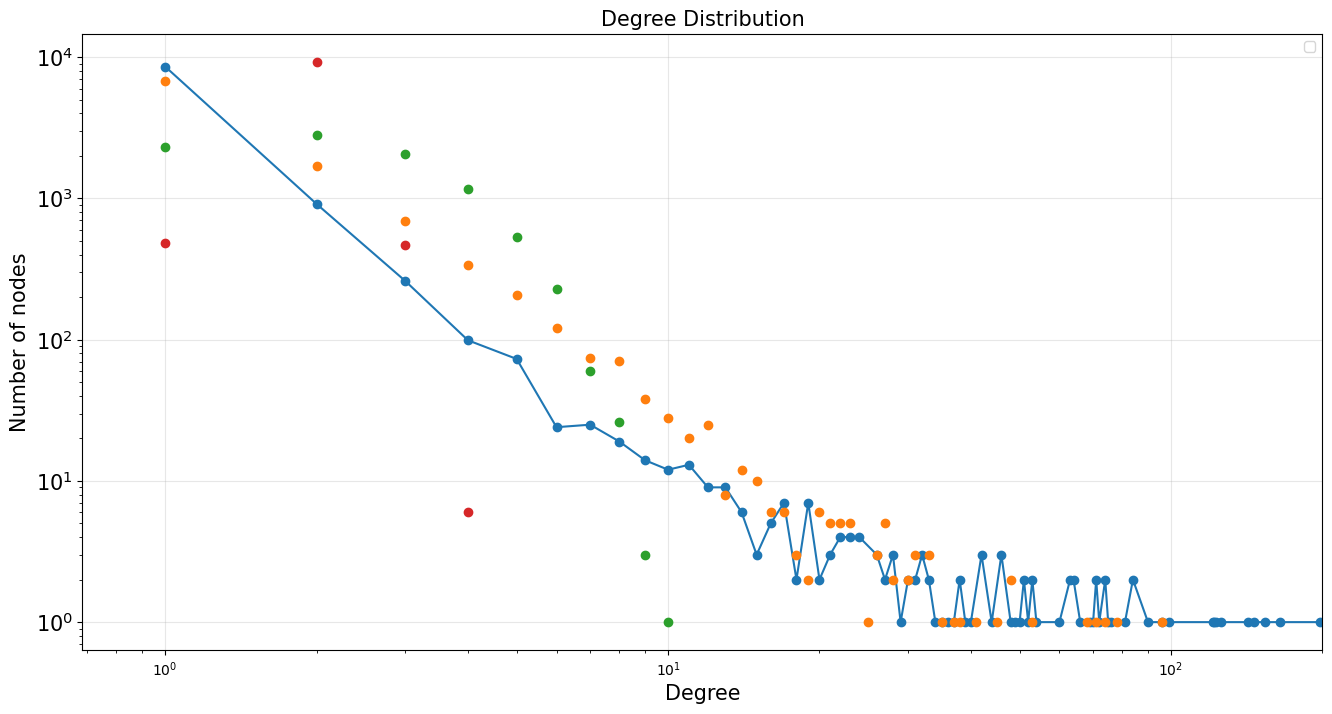

In [134]:
graphs = [(G, "Real World"), (ba, "Barabási–Albert"), (er, "Erdős-Rényi"),(ws,"Watts-Strogatz")]
degree_dist_plot(graphs)
plt.legend()
plt.savefig('NetChar_Degree distribution RW,ER,BA and WS.pdf')